# Selenium

## Instanciando o webdriver


O Selenium usa suas classes e um arquivo webdriver para automatizar os recursos do browser.

- webdriver - É o arquivo que permite a automatização do browser  
- service - Classe do Selenium que aponta a localização dos binários do webdriver  

Isso acarretava um problema de compatibilidade entre alguns computadores, pois era necessário que fosse feito o download do binário do driver compatível com a versão do navegador instalado no computador.

```python
    from Selenium import webdriver
    from selenium.webdriver.chrome.service import Service

    service = Service('path/chromedriver.exe')
    # abre a instancia do navegador
    driver = Webdriver.Chrome(service=service)
```

Uma alternativa a isso é utilizar a biblioteca [```webdriver-manager```](https://pypi.org/project/webdriver-manager/) que já faz o gerenciamento do driver correspondente ao navegador

Importação na nova versão do Selenium:

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)

In [23]:
# para abrir uma página podemos usar o método get, passando o link que será aberto pelo navegador
driver.get('https://selenium-python.readthedocs.io/')

## Navegando entre elementos na tela

### Pegando elementos na tela
 


Para [capturar um elemento na tela](https://selenium-python.readthedocs.io/locating-elements.html) temos dois métodos principais:

`find_element` e `find_elements` que retornam um elemento único e uma lista de elementos respectivamente.

Alem de apontar que estamos solicitando um elemento na tela, devemos informar o ***modo como deverá ser buscado*** esse elemento com a classe `By` do Selenium 
```python
    from selenium.webdriver.common.by import By
```

| Atributos da classe By      | Descrição |
| ----------- | ----------- |
| ID | Busca pelo atributo id       |
| NAME | Busca pela atributo name  |
| LINK_TEXT | Busca no texto do link (texto exato)|
| PARTIAL_LINK_TEXT | Busca em parte do texto do link |
| XPATH | Busca pelo xpath do elemento |
| TAG_NAME | Busca pelo nome da tag do elemento (e.g. "h1") |
| CLASS_NAME | Busca o elemento pela sua classe css |
| CSS_SELECTOR | Busca pela sua sintaxe CSS (e.g. uma tag \<p> com uma class='content' -> driver.find_element(By.CSS_SELECTOR, 'p.content'))|


In [16]:
from selenium.webdriver.common.by import By

# Encontrando um unico elemento
driver.find_element(By.LINK_TEXT,"4. Locating Elements").click()

In [32]:
# encontrando vários elementos com find_elements
elements_list = driver.find_elements(By.CLASS_NAME, "toctree-l1")

for i in elements_list:
    if 'LOCATING ELEMENTS' in i.text.upper():
        print(i.text)

4. Locating Elements
4.1. Locating by Id
4.2. Locating by Name
4.3. Locating by XPath
4.4. Locating Hyperlinks by Link Text
4.5. Locating Elements by Tag Name
4.6. Locating Elements by Class Name
4.7. Locating Elements by CSS Selectors
4. Locating Elements


### WebElement


Os elementos capturados com o find elements são derivados da classe [Web Element](https://www.selenium.dev/selenium/docs/api/py/webdriver_remote/selenium.webdriver.remote.webelement.html) do Selenium, que representa um elemento DOM e possuem as funções de interação com campos e formulários


|Function|Descrição|
|---|---|
|accessible_name| Retorna o nome assessível seguindo os princípios de [ARIA](https://developer.mozilla.org/en-US/docs/Web/Accessibility/ARIA)|
|aria_role|Retorna a regra de acessibilidade [ARIA](https://developer.mozilla.org/en-US/docs/Web/Accessibility/ARIA)|
|clear|Limpa o texto em um elemento de entrada de texto|
|click|Clica no elemento|
|find_element|Retorna um elemento buscado|
|find_elements|Retorna uma lista de elementos|
|get_attribute|Retorna o atributo fornecido|
|get_dom_attribute|Retorna o atributo fornecido, este método retorna apenas atributos declarados na marcação HTML do elemento.|
|get_property|Retorna a propriedade fornecida|
|id|Retorna o identificador interno do Selenium|
|is_displayed|Retorna se o elemento está visivel para o usuário|
|is_enabled|Retorna se o elemento está habilitado|
|is_selected|Retorna se o elemento está selecionado|
|location|Retorna a localização do elemento na tela|
|location_once_scrolled_into_view|Retorna onde um elemento está na tela para que possamos clicar nele. Este método deve fazer com que o elemento seja exibido|
|parent|Referência interna à instância do WebDriver na qual este elemento foi encontrado|
|rect|Um dicionário com o tamanho e localização do elemento.|
|screenshot|Salva uma captura de tela com formato PNG (recebe o caminho de onde deve ser salvo a imagem como argumento)|
|screenshot_as_base64|Obtém a captura de tela do elemento atual como uma string codificada em base64.|
|screenshot_as_png|Obtém a captura de tela do elemento atual como dados binários.|
|send_keys|Digitação do teclado, envia o texto passado como argumento para o elemento|
|shadow_root|Retorna o shadow_root do elemento ou um erro NoSuchShadowRoot caso não tenha| 
|size|Tamanho do elemento|
|submit|Botão de submit de formulário|
|tag_name|Retorna o tipo de tag|
|text|Valor de texto do elemento|
|value_of_css_property|Retorna o valor da propriedade CSS|

## Simulando a digitação em formulários e a interação da aplicação com o teclado

In [55]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.select import Select

service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service)


driver.get('https://demo.automationtesting.in/Register.html')

### Keys e send_keys

É possível enviar textos para um componente com a função send_keys, passando uma string com o texto pretendido, ou usando a função KEYS para simular a digitação de uma tecla específica do teclado

Importação:


--- 

```python
from selenium.webdriver.common.keys import Keys
```

--- 

<br>
Para o exemplo a seguir considere os seguintes campos de formulário   



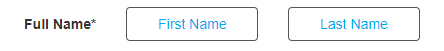


In [57]:
driver.get('https://demo.automationtesting.in/Register.html')

first_name = driver.find_element(By.XPATH, '//*[@id="basicBootstrapForm"]/div[1]/div[1]/input')
last_name = driver.find_element(By.XPATH, '//*[@id="basicBootstrapForm"]/div[1]/div[2]/input')

print('Valor inicial dos elementos...')
print('First Name: ', first_name.get_attribute('value'))
print('Last Name: ', last_name.get_attribute('value'))

first_name.send_keys('Texto alterado')
last_name.send_keys('Outro texto')

print('Valor após os send_keys...')
print('First Name: ', first_name.get_attribute('value'))
print('Last Name: ', last_name.get_attribute('value'))


Valor inicial dos elementos...
First Name:  
Last Name:  
Valor após os send_keys...
First Name:  Texto alterado
Last Name:  Outro texto


In [58]:
# similar ao exemplo anterior mas usando a combinação de textos com a tecla TAB do teclado
driver.get('https://demo.automationtesting.in/Register.html')

# atribui os elementos a uma variável
first_name = driver.find_element(By.XPATH, '//*[@id="basicBootstrapForm"]/div[1]/div[1]/input')
last_name = driver.find_element(By.XPATH, '//*[@id="basicBootstrapForm"]/div[1]/div[2]/input')

print('Valor inicial dos elementos...')
print('First Name: ', first_name.get_attribute('value'))
print('Last Name: ', last_name.get_attribute('value'))

# neste caso a interação será feita a partir do elemento de first_name
first_name.send_keys('Texto alterado', Keys.TAB, 'Acesso via tecla TAB')


print('Valor após os send_keys...')
print('First Name: ', first_name.get_attribute('value'))
print('Last Name: ', last_name.get_attribute('value'))


Valor inicial dos elementos...
First Name:  
Last Name:  
Valor após os send_keys...
First Name:  Texto alterado
Last Name:  Acesso via tecla TAB


### Get_attribute x Text




***.get_attribute('value')*** --> Retorna o valor da propriedade `value`  
***.text*** --> Retorna o `texto` do elemento


Os dois métodos tem resultados similares dependendo de como foi desenvolvido os componentes do site.   


Como a maioria dos componentes do site usado de exemplo possui o mesmo conteúdo em text e Value, foi alterado manualmente o valor de text para exemplificar a diferença entre cada um dos dois: 



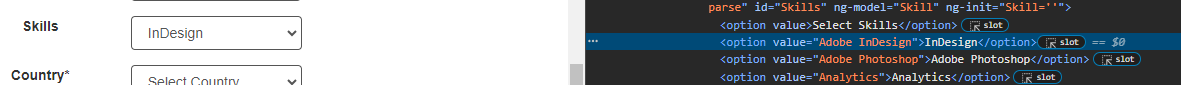


In [32]:
# valor normalmente acessado no backend ou por algum tipo de função de leitura via código
driver.find_element(By.XPATH, '//*[@id="Skills"]/option[2]').get_attribute('value')

'Adobe InDesign'

In [33]:
# valor que fica visível para quem acessa o site
driver.find_element(By.XPATH, '//*[@id="Skills"]/option[2]').text

'InDesign'

### Multi-line e text-area

Campos de text-area podem receber strings com mais de uma linha 

In [66]:
# simulando o ENTER para ira para a linha abaixo
driver.get('https://demo.automationtesting.in/Register.html')
area = driver.find_element(By.XPATH, '//*[@id="basicBootstrapForm"]/div[2]/div/textarea')

# apaga o texto do elemento caso exista
area.clear()
area.send_keys(
    'Primeira Linha', Keys.ENTER, 
    'Segunda Linha', Keys.ENTER, 
    'Terceira Linha'
    )

In [67]:
driver.get('https://demo.automationtesting.in/Register.html')
area = driver.find_element(By.XPATH, '//*[@id="basicBootstrapForm"]/div[2]/div/textarea')

# apaga o texto do elemento caso exista
area.clear()

# usando strings mult-line
texto = """Usando string com multiplas linhas
Primeira linha
Segunda Linha
Terceira Linha
"""
area.send_keys(texto)

### RadioButton e CheckBox

São componentes usados para selecionar opções pelo usuário:
- `RadioButton`: única seleção por grupo 
- `Checkbox`:  multipla seleções   

In [91]:
driver.get('https://demo.automationtesting.in/Register.html')

radio_list = driver.find_elements(By.NAME, 'radiooptions')

# seleciona todos os elementos
for element in radio_list:
    element.click()


# mesmo tendo sido selecionado o o botão Male anteriormente
# o radiobutton mantem apenas uma opção por grupo 
print('RadioButton')
for element in radio_list:
    print('botão: ',element.get_attribute('value'))
    print('Está selecionando: ',element.is_selected())


RadioButton
botão:  Male
Está selecionando:  False
botão:  FeMale
Está selecionando:  True


In [90]:
from random import sample

driver.get('https://demo.automationtesting.in/Register.html')


check_list = list()

for i in ['checkbox1', 'checkbox2', 'checkbox3']:
    check_list.append(driver.find_element(By.ID, i))

# seleciona aleatóriamente 2 valores
for i in sample(check_list, 2):
    i.click()

print('Checkbox ')
for element in check_list:
    print('botão: ',element.get_attribute('value'))
    print('Está selecionando: ',element.is_selected())


Checkbox 
botão:  Cricket
Está selecionando:  True
botão:  Movies
Está selecionando:  True
botão:  Hockey
Está selecionando:  False


### Select

O Selenium nos dá opções mais avançadas pra tratar de campos do tipo select através da classe `Select`

```python
from selenium.webdriver.support.select import Select
```

In [100]:
select_element  = Select(driver.find_element(By.XPATH, '//*[@id="Skills"]'))

In [103]:
# mostra as 10 primeiras opções de seleção
for i in select_element.options[:10]:
    print(i.text)

Select Skills
Adobe InDesign
Adobe Photoshop
Analytics
Android
APIs
Art Design
AutoCAD
Backup Management
C


In [107]:
# Opções específicas para seleção
select_element.select_by_index(5)
select_element.select_by_value('APIs')
select_element.select_by_visible_text('APIs')

In [109]:
# pega a primeira seleção
select_element.first_selected_option.text

'APIs'